<div class="frontmatter text-center">
<h2> MATH5027 Scientific Python, Fall 2017</h2>

### From the extra notebook:


Can you frame the face with a black locket? 


That is identify the corresponding units of the matrix that you want to be black (se them equal to zero). The center of the face is around (660, 330), so you need to define a mask by this condition $(y-300)^2 + (x-660)^2$. Look up np.ogrid to creat column and row matrixes out of the arrays. Indeed, you do need a matrix! :)

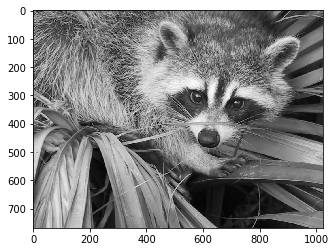

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import misc

face = misc.face(gray=True)

plt.imshow(face, cmap=plt.cm.gray)
plt.show()

In [61]:
len(face), len(face[0])

(768, 1024)

In [62]:
gridX = len(face[0])
gridY = len(face)
gridX, gridY, type(gridX)

(1024, 768, int)

In [63]:
y, x = np.ogrid[0:gridY, 0:gridX]
y.shape, x.shape, type(x)

((768, 1), (1, 1024), numpy.ndarray)

In [64]:
y

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [65]:
x

array([[   0,    1,    2, ..., 1021, 1022, 1023]])

center of the face is already given:

In [66]:
facecenterX, facecenterY = (660, 300)

now I can build a mask. The formula is $(y-300)^2 + (x-660)^2$ I will make it black color around this circle

In [69]:
mask = ((x - facecenterX)**2) + ((y - facecenterY)**2) > 256**2 #outside the circle will be black, so...

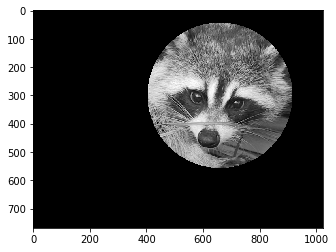

In [70]:
face = misc.face(gray=True)

face[mask] = 0 
plt.imshow(face, cmap=plt.cm.gray)

### Class 8:

1) Choose a wikipedia page. For each neighbor of the page, get all of its links, keeping only those present in the list of neighbors of the ego. Add each link as a directed edge to your graph.

2) Look up the PageRank algorithm in the networkx documentation. Run it and see which nodes are most important according to this measure. Create a scatterplot where you use in-degree on one axis, and pagerank on the other axis. 

3) Plot the distributions of out-degree and in-degree for your network on the same plot, on a log-log scale.

4) Create a BA graph of 100 nodes and with $m=3$ using the built in networkx function. Set an attribute size for each node proportional to the degree of the node. Visualize the graph using for nodes the size set in the attribute. 

https://en.wikipedia.org/wiki/Raspberry_Pi

In [1]:
import re
import urllib.request
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import networkx as nx

I added one line to your function. It was not working without this: urllib.request.Request.set_proxy <p>
special thanks to stackoverflow as usual

In [2]:
#define a function to get the links from a downloaded html string
def get_links(url):
    '''pass a url and return a list of wikipedia links'''
    urllib.request.Request.set_proxy #my line
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    base=result.read()
    base=str(base)
    splitting=base.split('<a href=') 
    links=[]
    for nn in splitting:
        #use a regular expression to pick out the wikipedia internal links
        link=[x for x in re.findall('"([^"]*)"',nn) if x[0:5]=='/wiki']
        if len(link)>0:
            #links containing : are general wikipedia pages that we want to skip
            if ':' in link[0]:
                pass
            else:
                links.append('https://en.wikipedia.org'+link[0])
    #take the set to remove duplicates
    return list(set(links))

In [3]:
#declare your starting page
base_page = 'https://en.wikipedia.org/wiki/Raspberry_Pi'

#get the neighbors of your base page
first_neighbors = get_links(base_page)

#create a networkx DiGraph object and add the edges from the base_page to the neighbors
D=nx.DiGraph()
for page in first_neighbors:
    D.add_edge(base_page,page)

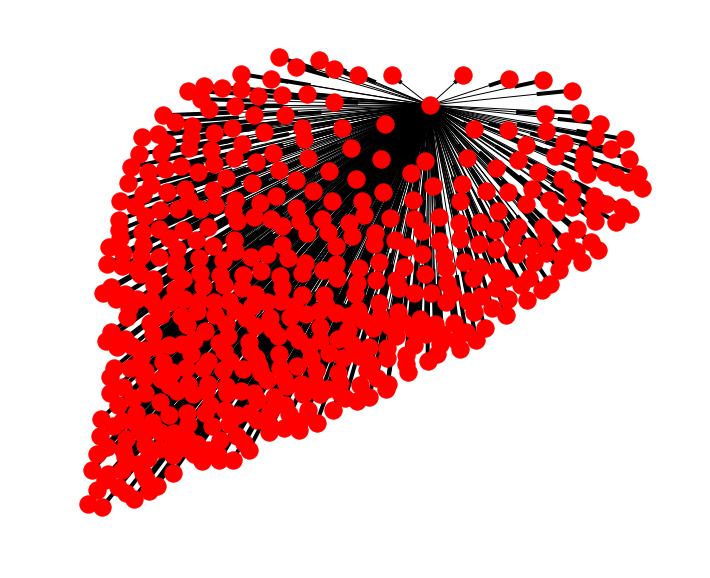

In [4]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(D, with_labels=False)
plt.show()

In [5]:
D2=nx.DiGraph()
for i in first_neighbors:
    second_neighbors = get_links(i)

    for j in second_neighbors:
        if j in first_neighbors:
            D2.add_edge(j,i)

In [6]:
D3 = D2.copy()
D3.remove_node('https://en.wikipedia.org/wiki/Raspberry_Pi')
D3.nodes()

['https://en.wikipedia.org/wiki/Main_Page',
 'https://en.wikipedia.org/wiki/Ark_OS',
 'https://en.wikipedia.org/wiki/Cubieboard',
 'https://en.wikipedia.org/wiki/Graphical_user_interface',
 'https://en.wikipedia.org/wiki/Linux',
 'https://en.wikipedia.org/wiki/Linux_distribution',
 'https://en.wikipedia.org/wiki/Shell_(computing)',
 'https://en.wikipedia.org/wiki/Haiku_(operating_system)',
 'https://en.wikipedia.org/wiki/File_system',
 'https://en.wikipedia.org/wiki/GitHub',
 'https://en.wikipedia.org/wiki/Open_source',
 'https://en.wikipedia.org/wiki/Application_programming_interface',
 'https://en.wikipedia.org/wiki/Thread_(computing)',
 'https://en.wikipedia.org/wiki/RISC_OS',
 'https://en.wikipedia.org/wiki/ARM_architecture',
 'https://en.wikipedia.org/wiki/Android_(operating_system)',
 'https://en.wikipedia.org/wiki/Arch_Linux',
 'https://en.wikipedia.org/wiki/Operating_system',
 'https://en.wikipedia.org/wiki/OpenELEC',
 'https://en.wikipedia.org/wiki/Void_Linux',
 'https://en.wi

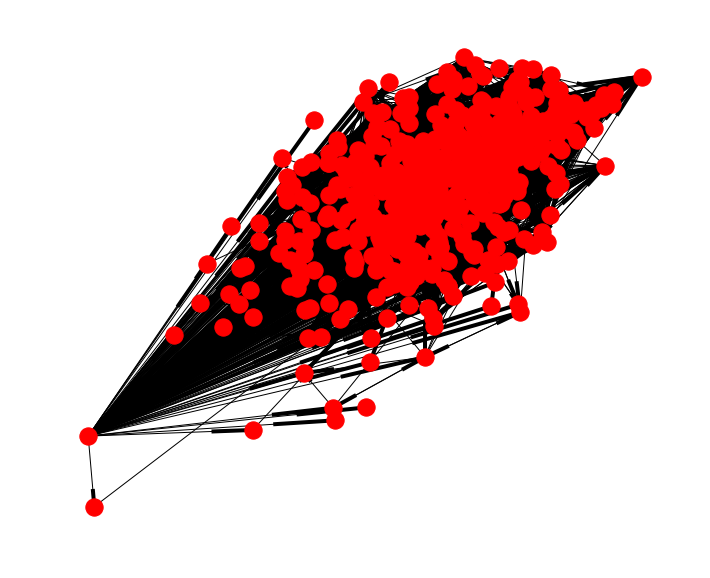

In [7]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(D3, with_labels=False)
plt.show()

In [8]:
pr = nx.pagerank(D3)

In [9]:
import pandas as pd
from pandas import Series
pagerank = pd.Series(pr)

In [10]:
degrees = D3.degree()
degrees = pd.Series(degrees)

In [11]:
df = pd.DataFrame(pagerank, columns=['pagerank'])
df['degrees'] = degrees

df.sort_values(by = 'degrees', ascending=False).describe()

,pagerank,degrees
count,489.000000,489.000000
mean,0.002045,67.578732
std,0.001655,71.344282
min,0.000400,1.000000
25%,0.000717,14.000000
50%,0.001184,35.000000
75%,0.003714,98.000000
max,0.008107,490.000000


In [12]:
df.corr()

,pagerank,degrees
pagerank,1.000000,0.669956
degrees,0.669956,1.000000


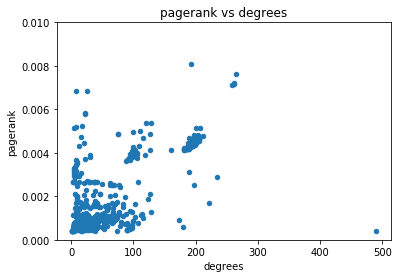

In [30]:
plot = df.plot.scatter(x='degrees', y='pagerank', title = 'pagerank vs degrees')
plot.set_ylim(0,0.01);

In [31]:
outs = pd.Series(D3.out_degree())
ins = pd.Series(D3.in_degree())

ins_outs = pd.DataFrame(ins, columns=['in_degrees'])
ins_outs['out_degrees'] = outs

ins_outs.head()

,in_degrees,out_degrees
https://en.wikipedia.org/wiki/1080p,21,32
https://en.wikipedia.org/wiki/2D_computer_graphics,8,8
https://en.wikipedia.org/wiki/3D_computer_graphics,6,21
https://en.wikipedia.org/wiki/3D_printing,6,16
https://en.wikipedia.org/wiki/480i,14,13


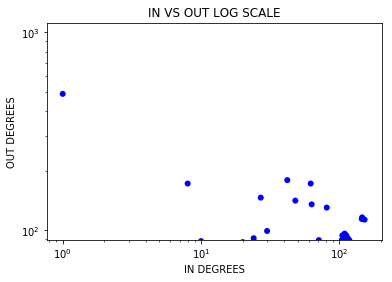

In [32]:
fig = plt.figure()
ax = plt.gca()

ax.scatter(ins_outs['in_degrees'] ,ins_outs['out_degrees'] , c='blue', edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("IN DEGREES")
plt.ylabel("OUT DEGREES")
plt.title("IN VS OUT LOG SCALE")

4) Create a BA graph of 100 nodes and with  m=3m=3  using the built in networkx function. Set an attribute size for each node proportional to the degree of the node. Visualize the graph using for nodes the size set in the attribute.

In [33]:
ba = nx.barabasi_albert_graph(100,3, seed=1)
print(nx.info(ba))

Name: barabasi_albert_graph(100,3)
Type: Graph
Number of nodes: 100
Number of edges: 291
Average degree:   5.8200


In [34]:
import numpy as np
node_degrees = pd.Series(ba.degree())

node_degrees = np.array(node_degrees)
type(node_degrees), node_degrees.size, node_degrees[0:11]

(numpy.ndarray,
 100,
 array([27, 17,  2, 20, 18, 16,  7, 26,  9,  8,  5], dtype=int64))

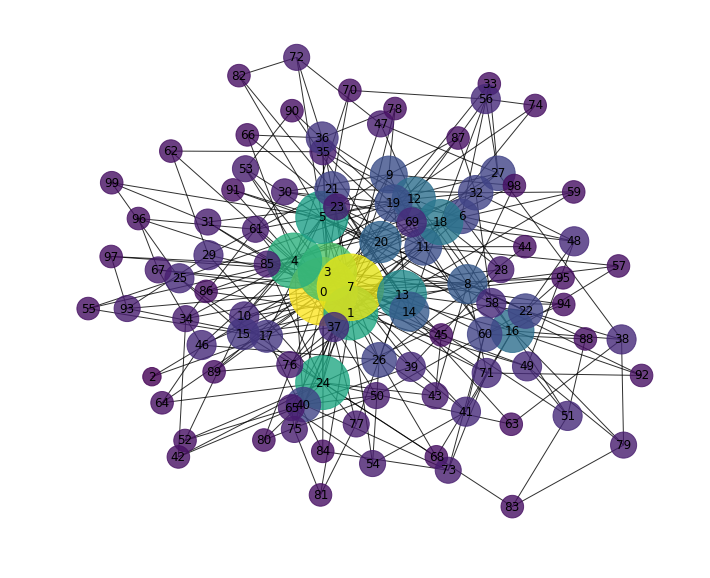

In [37]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(ba, 
                 with_labels=True, 
                 node_size=node_degrees*170, 
                 node_color=node_degrees,
                 alpha = 0.8)
plt.show()

The most important nodes are visible here. I have done another one later using another wiki site. It was my hometown in Turkey. It is a small southern Mediterranean town. Interestingly the network plot revealed an ideal roadtrip plan to southern seaside towns. I am planning to run that script before my next holiday to arrange my AirBnB bookings. I found it quite usefull. It is even possible to use it in a recommendation engine.